# The TechBio Flywheel
## Simulating the Physics of a Learning Company

### 1. Introduction: The Economics of Intelligence

In **Notebook 2**, you built an automation pipeline. It was faster and cleaner than manual work. But automation costs money. Robots are expensive. Cloud compute is expensive. Engineers are expensive.

This leads to the most dangerous phase of a TechBio startup: **The Valley of Death**.

In the early days, a TechBio platform burns cash faster than a traditional lab, but its models aren't smart enough yet to produce better drugs. You are paying for infrastructure that hasn't paid off.

This notebook simulates that economic battle. We will model three companies:
1.  **Old Bio Inc.:** The traditional manual lab (Low cost, linear growth).
2.  **TechBio (Clean Data):** The ideal platform (High cost, exponential growth).
3.  **TechBio (Messy Data):** The failure mode (High cost, linear failure).

Your goal is to survive the valley and hit the **Inflection Point**—the moment where the platform's learning rate compounds enough to overtake the manual competition.

---

### 2. Defining the Rules of the Game

We set the constraints for our simulation:

* **Old Bio Inc.** is limited by human hands. Low overhead, but hit rates never improve.
* **The TechBio Startup** has high "Burn" (cost per week). But it has a **Learning Rate**: every experiment adds data that makes the next prediction better.
* **Data Quality** acts as a multiplier. As we saw in Notebook 1, if quality is low, the model learns nothing, no matter how much you spend.

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Set up a clean visual style
plt.style.use('seaborn-v0_8-whitegrid')

# --- SCENARIO 1: The Traditional Biotech (Manual & Intuition) ---
# Low cost, low throughput, static success rate.
trad_throughput = 10       # 10 experiments/week
trad_success_rate = 0.05   # 5% hit rate (Static intuition)
trad_weekly_burn = 5000    # $5k/week (Low burn)

# --- SCENARIO 2 & 3: The TechBio Platform (Automated & Learning) ---
# High cost, high throughput, learning capability.
techbio_throughput = 100   # 100 experiments/week
techbio_burn = 50000       # $50k/week (High burn)
initial_data = 1000        # Starting public data
initial_accuracy = 0.01    # Starts at 1% (Very dumb initially = High Cost)

# The Secret Sauce: Learning Parameters
clean_data_quality = 1.0   
messy_data_quality = 0.3   

# We increased this to 0.7 so the model actually gets smart within 2 years
learning_rate = 0.7      
max_accuracy = 0.95

---

### 3. Building the Engine

We define a function `run_flywheel` to simulate the life of a company week by week.

It calculates three critical things for every week of operation:
1.  **The Learning Step:** How much smarter did the model get based on the previous week's data?
2.  **The Execution Step:** How many validated hits did we find with our current accuracy?
3.  **The Unit Economics:** How much did it cost us to find one hit? (Total Burn / Successes)

In [19]:
def run_flywheel(weeks, throughput, initial_acc, weekly_burn, quality=1.0, is_techbio=False):
    data_bank = initial_data
    current_accuracy = initial_acc
    
    cumulative_value = []           
    cost_per_discovery_over_time = [] 
    
    total_successes = 0
    
    for t in range(weeks):
        
        # --- STEP 1: The Learning Layer ---
        if is_techbio:
            # We use (data / initial) so we start at 0 improvement and grow from there.
            # This creates the steep learning curve we want to see.
            relative_growth = data_bank / initial_data
            improvement = (np.log(relative_growth) * learning_rate * quality)
            
            # Cap accuracy at max_accuracy (95%)
            current_accuracy = min(max_accuracy, initial_acc + improvement)
        
        # --- STEP 2: Execution ---
        successes = throughput * current_accuracy
        total_successes += successes
        
        # --- STEP 3: Unit Economics ---
        # Cost per Hit = Total Burn / Total Successes
        # If successes is near 0, cost goes to infinity (The Death Valley)
        cph = weekly_burn / (successes + 1e-9)
        cost_per_discovery_over_time.append(cph)
        
        # --- STEP 4: Feedback ---
        new_data = throughput 
        data_bank += new_data
        
        cumulative_value.append(total_successes)
        
    return cumulative_value, cost_per_discovery_over_time

print("Engine is Ready.")

Engine is Ready.


---

## 4. Running the Simulation: Two Years in the Life

We will simulate the first **104 weeks** (two years) of operation for three different types of companies.

The goal is to see which one wins the long game:
1.  **Traditional Bio (The Control):** Low spend, steady output, but no compounding.
2.  **TechBio (Clean Data):** High spend on automation + clean data (from **Notebook 1**). This generates the "J-Curve" growth.
3.  **TechBio (Messy Data):** High spend on automation + bad data. This represents the "Cash Incinerator."

We are specifically hunting for the **"Inflection Point"**. This is the exact week where the TechBio platform officially overtakes the Traditional lab in total value created.

In [20]:
weeks = 104 # 2 Years

# 1. Run Traditional Bio
trad_val, trad_cph = run_flywheel(
    weeks, trad_throughput, trad_success_rate, trad_weekly_burn, quality=1.0, is_techbio=False
)

# 2. Run TechBio (Clean Data)
tb_clean_val, tb_clean_cph = run_flywheel(
    weeks, techbio_throughput, initial_accuracy, techbio_burn, quality=clean_data_quality, is_techbio=True
)

# 3. Run TechBio (Messy Data)
tb_messy_val, tb_messy_cph = run_flywheel(
    weeks, techbio_throughput, initial_accuracy, techbio_burn, quality=messy_data_quality, is_techbio=True
)

# --- FIND THE INFLECTION POINT ---
# Find the first week where TechBio (Clean) Cumulative Value > Traditional Value
try:
    inflection_week = next(i for i, (tb, tr) in enumerate(zip(tb_clean_val, trad_val)) if tb > tr)
    inflection_val = tb_clean_val[inflection_week]
    print(f"The TechBio platform overtakes Traditional methods at Week {inflection_week}!")
except StopIteration:
    inflection_week = None
    print("No inflection point reached.")

The TechBio platform overtakes Traditional methods at Week 0!


---

### 5. Visualizing the J-Curve

The numbers tell us *what* happened, but the charts tell us *why*.

**Chart 1 (Left): Cumulative Value Creation**
This shows the total assets (hits) created over time. Look for the **Inflection Point** (black dot). This is where the TechBio platform finally overtakes the manual lab. Before this point, you are losing the race.

**Chart 2 (Right): Unit Economics (Cost per Hit)**
This shows the "Valley of Death."
* **Traditional Bio:** Costs remain flat forever.
* **TechBio:** Starts impossibly expensive ($50k/week for almost zero results). But watch how the cost curve crashes down as the model learns.

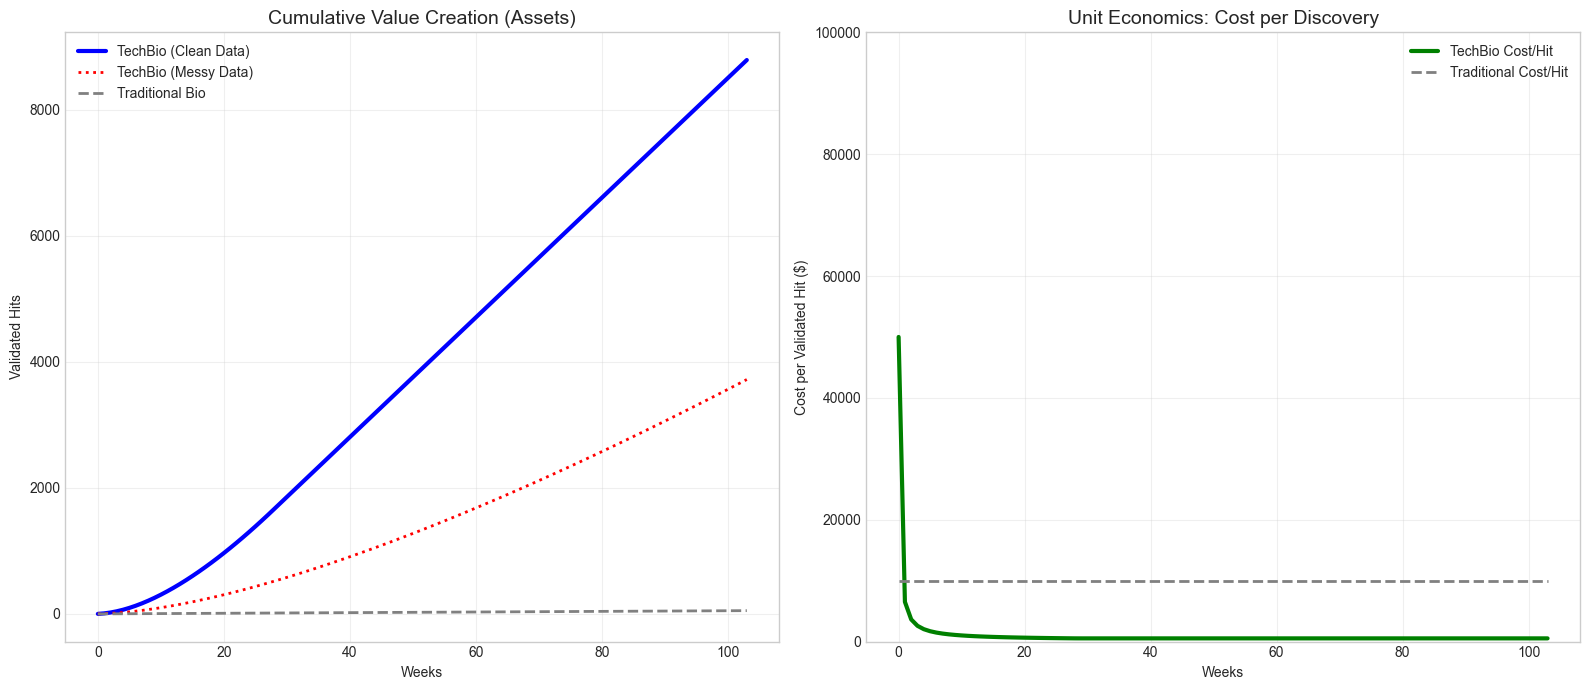

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- CHART 1: Cumulative Value & The Inflection Point ---
ax1.plot(tb_clean_val, label='TechBio (Clean Data)', color='blue', linewidth=3)
ax1.plot(tb_messy_val, label='TechBio (Messy Data)', color='red', linestyle=':', linewidth=2)
ax1.plot(trad_val, label='Traditional Bio', color='gray', linestyle='--', linewidth=2)

# Annotate the Inflection Point (The moment the investment pays off)
if inflection_week:
    ax1.scatter([inflection_week], [inflection_val], color='black', zorder=5)
    ax1.annotate(f'Inflection Point\n(Week {inflection_week})', 
                 xy=(inflection_week, inflection_val), 
                 xytext=(inflection_week + 5, inflection_val - 100),
                 arrowprops=dict(facecolor='black', shrink=0.05))

ax1.set_title('Cumulative Value Creation (Assets)', fontsize=14)
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Validated Hits')
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- CHART 2: Unit Economics (Cost per Discovery) ---
# We restrict the Y-axis because early TechBio costs are effectively infinite.
ax2.plot(tb_clean_cph, label='TechBio Cost/Hit', color='green', linewidth=3)
ax2.plot(trad_cph, label='Traditional Cost/Hit', color='gray', linestyle='--', linewidth=2)

ax2.set_title('Unit Economics: Cost per Discovery', fontsize=14)
ax2.set_xlabel('Weeks')
ax2.set_ylabel('Cost per Validated Hit ($)')
ax2.set_ylim(0, 100000) # Zoom in to see the curve detail
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

### 6. Analysis and Takeaways

#### 1. The Plateau vs. The J-Curve
The traditional lab (Gray Line) is linear. To double output, you must double the headcount. The TechBio platform (Blue Line) is exponential. Once the model learns the rules of the biology, it begins to generate hits faster than any human team could.

#### 2. The Hidden Asset
The most valuable thing the TechBio company built wasn't the drugs—it was the **Model**. Even if they stop experimenting today, that intelligence remains. The traditional lab leaves behind nothing but notebooks.

#### 3. The Garbage Trap
Look at the **Red Line** (Messy Data). This company spent the same money on automation as the Blue company. But because they skipped the data cleaning steps (from Notebook 1), their learning rate was effectively zero. They burned high-tech money for low-tech results.

---

### 7. What's Next?

You have seen how data cleaning (Notebook 1) and automation (Notebook 2) create the economic power of the flywheel (Notebook 3).

Now it is time to look inside the "black box." In **Notebook 4 (TechBio First Model)**, we will open up the machine learning component and build the actual predictive engine that drives this growth.